In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Training set shape: (227845, 29), Testing set shape: (56962, 29)

Logistic Regression Model Evaluation
Accuracy: 0.9743513219339208
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



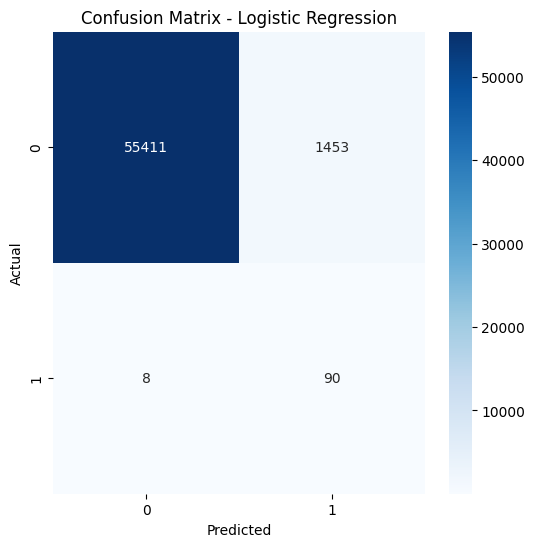


Decision Tree Model Evaluation
Accuracy: 0.9977528878901724
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.74      0.53        98

    accuracy                           1.00     56962
   macro avg       0.71      0.87      0.77     56962
weighted avg       1.00      1.00      1.00     56962



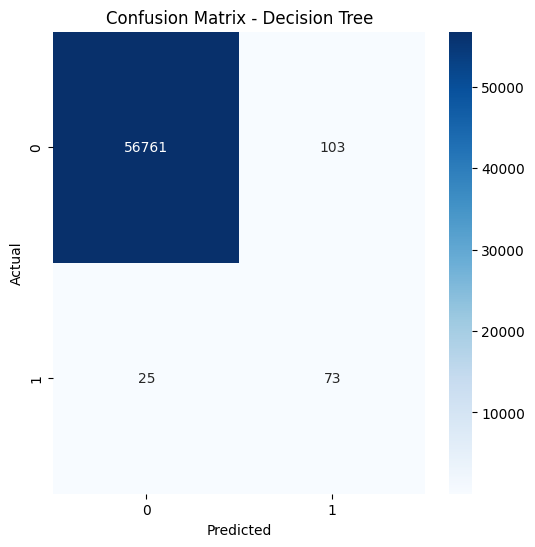

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Step 2: Preprocess the data
# Normalize the 'Amount' feature using StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

# Check class distribution
print("Class Distribution:\n", data['Class'].value_counts())

# Step 3: Split the dataset into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Step 4: Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate Logistic Regression Model
print("\nLogistic Regression Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 6: Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree Model
print("\nDecision Tree Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()